<a href="https://colab.research.google.com/github/Romulomrs/bases/blob/main/IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
print(iris['DESCR'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
import pandas as pd


print("\nMatriz de confusão detalhada:\n",
      pd.crosstab(y_test, predictions, rownames=['Real'], colnames=['Predito'],
      margins=True, margins_name='Todos'))


Matriz de confusão detalhada:
 Predito   0   1   2  Todos
Real                      
0        15   0   0     15
1         0  11   2     13
2         0   0  10     10
Todos    15  11  12     38


In [6]:
import sklearn.metrics as metrics
print("Relatório sobre a qualidade:\n")
print(metrics.classification_report(y_test, predictions, target_names=['Setosa', 'Versicolor', 'Virgínica']))

Relatório sobre a qualidade:

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       1.00      0.85      0.92        13
   Virgínica       0.83      1.00      0.91        10

    accuracy                           0.95        38
   macro avg       0.94      0.95      0.94        38
weighted avg       0.96      0.95      0.95        38



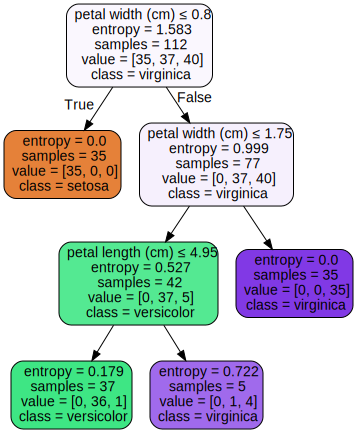

In [7]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data, format="png")
graph
